In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Implementing Logistic Regression Class

In [2]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [24]:
class LogisticRegression:
    def __init__(self):
        self.weights=None
        self.bias=None

    def nlloss(self,y,y_pred):
        '''calculate negative log liklihood error'''
        lh= np.dot(y,np.log(y_pred))+np.dot(1-y,np.log(1-y_pred))
        lh=(-1)*(np.sum(lh))
        return lh/y.shape[0]
    
    def accuracy(self,y,y_pred):
        ''' calculate correct prediction out of total'''
        y_pred=np.array([1 if i>=0.5 else 0 for i in y_pred])
        return (y==y_pred).sum()/y.shape[0]

    def gradients(self,X,y,y_pred):
        grad_w=np.dot(X.T,(y_pred-y))/X.shape[0]
        grad_b=np.sum(y_pred-y)/X.shape[0]
        return (grad_w,grad_b)

    def gradient_descent(self,grad_w,grad_b,lr):
        self.weights-=(lr*grad_w)
        self.bias-=(lr*grad_b)

    def train(self,X,y,lr=0.001,epochs=100):
        '''X: data features an (m,n) shape numpy array,
              where m= number of examples, n= number of features
           y: data label a (n,1) shaped vector
           lr: learning rate
           epochs: number of times training loop should run'''
        self.weights=np.zeros(X.shape[1])
        self.bias=0
        losses=[]
        scores=[]
        for i in range(epochs):
            y_pred=sigmoid(np.dot(X,self.weights)+self.bias)
            loss=self.nlloss(y,y_pred)
            score=self.accuracy(y,y_pred)
            losses.append(loss)
            scores.append(score)
            grad_w,grad_b=self.gradients(X,y,y_pred)
            self.gradient_descent(grad_w,grad_b,lr)
            #print("loss={} accuracy={}".format(loss,score))
        plt.plot(losses,label='loss',c='r')
        plt.legend()
        plt.show()
        plt.plot(scores,label='accuracy',c='b')
        plt.legend()
        plt.show()

    def predict(self,X_test):
        ''' X_test: test features m,n dimesional numpy array'''
        prob=sigmoid(np.dot(X_test,self.weights)+self.bias)
        return np.array([1 if i>=0.5 else 0 for i in prob]),prob

### Loading Dataset

In [4]:
df=pd.read_csv('Iris.csv').drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
def lblIdx(target):
    labels=np.unique(target)
    return {i:n for n,i in enumerate(labels)}

In [8]:
label_to_index=lblIdx(df['Species'].values)
label_to_index

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [22]:
index_to_label={v:k for k,v in label_to_index.items()}
index_to_label

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [10]:
X,y= df.loc[:,df.columns[:-1]].values,df['Species'].values

### train test split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/5,random_state=42)

In [12]:
print(len(X_train),len(X_test))

120 30


### normalization

In [13]:
mean=X.mean(axis=0)
std=X.std(axis=0)

In [14]:
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

### Given Problem is a multiclass classification we will use One vs Rest algorithm

Training Iris-setosa vs Rest!!


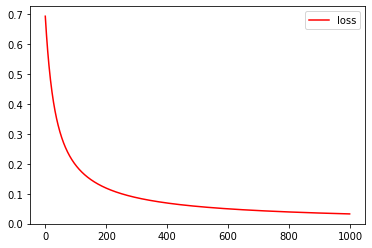

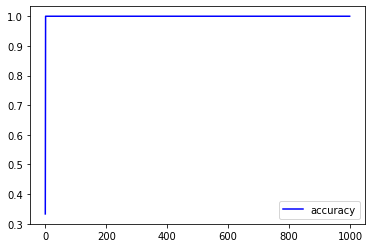

Training Iris-versicolor vs Rest!!


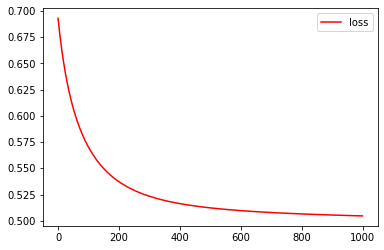

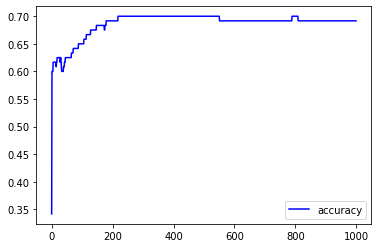

Training Iris-virginica vs Rest!!


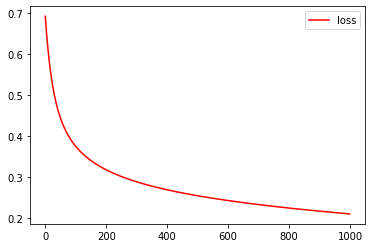

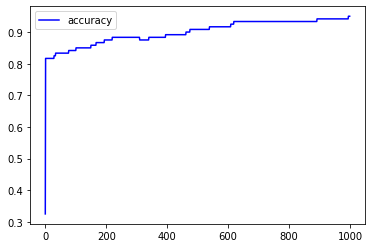

In [25]:
epochs=1000
model={}
for i in label_to_index:
    model[i]=LogisticRegression()
    y_temp=np.array([1 if j==i else 0 for j in y_train])
    print(f'Training {i} vs Rest!!')
    model[i].train(X_train,y_temp,lr=0.03,epochs=epochs)

In [33]:
def evaluate(X,y,model):
    probabilities=[]
    for i in label_to_index:
        _,prob=model[i].predict(X)
        probabilities.append(prob)
    predictions=np.array([index_to_label[j] for j in np.array(probabilities).argmax(axis=0)])
    acc=(y==predictions).sum()/y.shape[0]
    results={
        'pred':predictions,
        'acc': acc,
        'metrics': metrics.classification_report(y,predictions)
    }
    mat=metrics.confusion_matrix(y,predictions)
    col=col=np.unique(y)
    data={col[n]+'-Pred':mat.T[n] for n in range(len(col))}
    cfm=pd.DataFrame(data)
    cfm.index=[i+'-Real' for i in col]
    results['confusion_matrix']=cfm
    return results

In [34]:
results=evaluate(X_test,y_test,model)